In [1]:
from direct_integration import get_A_omega, compute_memory_kernel
import jax.numpy as jnp
import matplotlib.pyplot as plt

In [2]:
eta = 1.0
omega_c = 10.0
omegas = jnp.linspace(0, 30, 5000)

# 1. Ohmic (s=1)
ohmic_spectral_density = get_A_omega(omegas, eta, omega_c, s=1.0)

# 2. Sub-Ohmic (s=0.5)
sub_ohmic_spectral_density = get_A_omega(omegas, eta, omega_c, s=0.5)

# 3. Super-Ohmic (s=3.0) 
super_ohmic_spectral_density = get_A_omega(omegas, eta, omega_c, s=3.0)

W0203 10:36:21.828702    5714 cuda_executor.cc:1802] GPU interconnect information not available: INTERNAL: NVML doesn't support extracting fabric info or NVLink is not used by the device.
W0203 10:36:21.831105    5611 cuda_executor.cc:1802] GPU interconnect information not available: INTERNAL: NVML doesn't support extracting fabric info or NVLink is not used by the device.


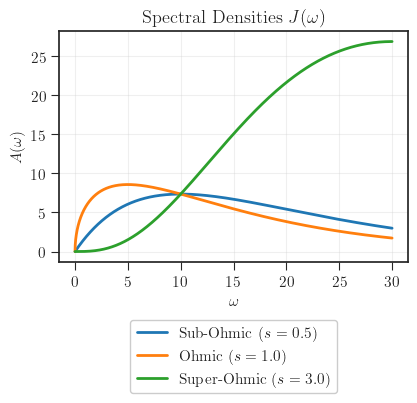

In [3]:
plt.style.use(['seaborn-v0_8-white', './style.mplstyle'])

fig, ax = plt.subplots(figsize=(4.5, 3))

plt.plot(omegas, ohmic_spectral_density, label=r'Sub-Ohmic ($s=0.5$)', linewidth=2)
plt.plot(omegas, sub_ohmic_spectral_density, label=r'Ohmic ($s=1.0$)', linewidth=2)
plt.plot(omegas, super_ohmic_spectral_density, label=r'Super-Ohmic ($s=3.0$)', linewidth=2)

plt.title(r"Spectral Densities $J(\omega)$")
plt.xlabel(r'$\omega$')
plt.ylabel(r'$A(\omega)$')
plt.legend(loc='lower center', ncol=1, bbox_to_anchor=(0.5, -0.6))
plt.grid(True, alpha=0.3)
plt.show()

In [4]:
times = jnp.linspace(-0.6, 0.6, 5000)
beta = 1.0
w_max = 1_000   # Integration limit (should be >> OMEGA_C)
n_steps = 5000  # Precision of integration

# 1. Ohmic (s=1)
C_t_ohmic = compute_memory_kernel(times, eta, omega_c, s=1.0)

# 2. Sub-Ohmic (s=0.5)
C_t_sub_ohmic = compute_memory_kernel(times, eta, omega_c, s=0.5)

# 3. Sub-Ohmic (s=0.5)
C_t_super_ohmic = compute_memory_kernel(times, eta, omega_c, s=3.0)

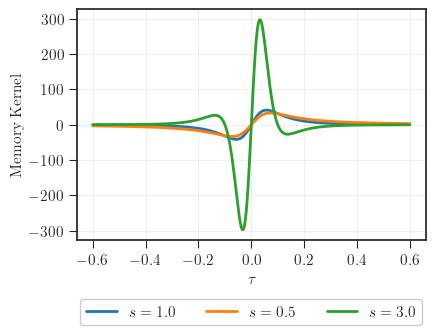

In [13]:
fig, ax = plt.subplots(figsize=(4.5, 3))

plt.plot(times, C_t_ohmic, label=r'$s=1.0$', linewidth = 2)
plt.plot(times, C_t_sub_ohmic, label=r'$s=0.5$', linewidth = 2)
plt.plot(times, C_t_super_ohmic, label=r'$s=3.0$', linewidth = 2)

plt.xlabel(r'$\tau$')
plt.ylabel(r'Memory Kernel')
plt.grid(True, alpha=0.3)
plt.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.4))
plt.grid(True, alpha=0.3)
plt.show()